# Getting Familiar with Pandas pt 4

## Data Visualizations with Groupby, Matplotlib, & Seaborn  

### Charity Miller

## Plotting with the Boston Dataset matplotlib and exploring the data

In [16]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = pd.Series(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET'],
      dtype='object')

In [18]:
#Explaination of dataset
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [19]:
#Must import matplotlib to plot in pandas
import matplotlib.pyplot as plt
%matplotlib inline

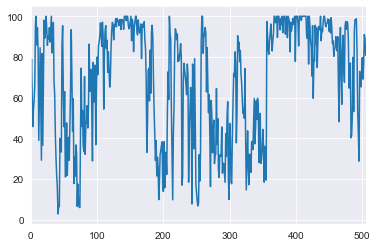

In [20]:
boston_df['AGE'].plot()

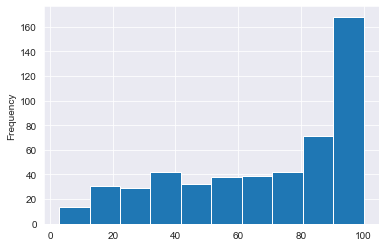

In [21]:
boston_df['AGE'].plot.hist()

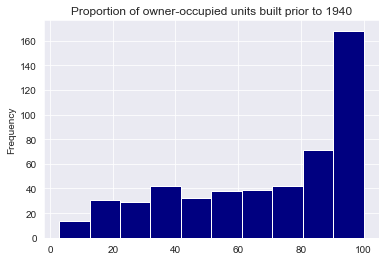

In [22]:
#Add title to plot and change color
boston_df['AGE'].plot.hist(title='Proportion of owner-occupied units built prior to 1940', colormap='jet')

Text(0, 0.5, 'FREQUENCY')

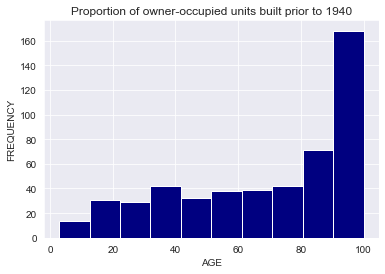

In [23]:
#Add titles to X and Y axis
boston_df['AGE'].plot.hist(title='Proportion of owner-occupied units built prior to 1940', colormap='jet')
plt.xlabel('AGE')
plt.ylabel('FREQUENCY')

In [24]:
#Comparing features with variables
correlations = boston_df.corr()
correlations = correlations['TARGET']
print(correlations)


CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
TARGET     1.000000
Name: TARGET, dtype: float64


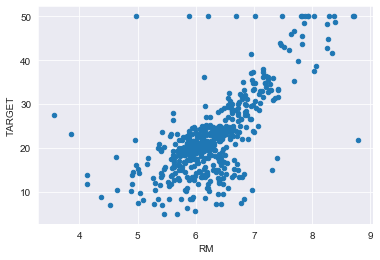

In [25]:
#Plotting the correlation of a variable and feature
boston_df.plot.scatter(x='RM', y='TARGET')

### Using Groupby for visualizations

Here we use the Groupby function to group the CHAS variable to seperate the properties by whether they tract bound the river (1) or not (0). Afterward the properties are separated by features (column names)



0.0         AxesSubplot(0.1,0.15;0.363636x0.75)
1.0    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

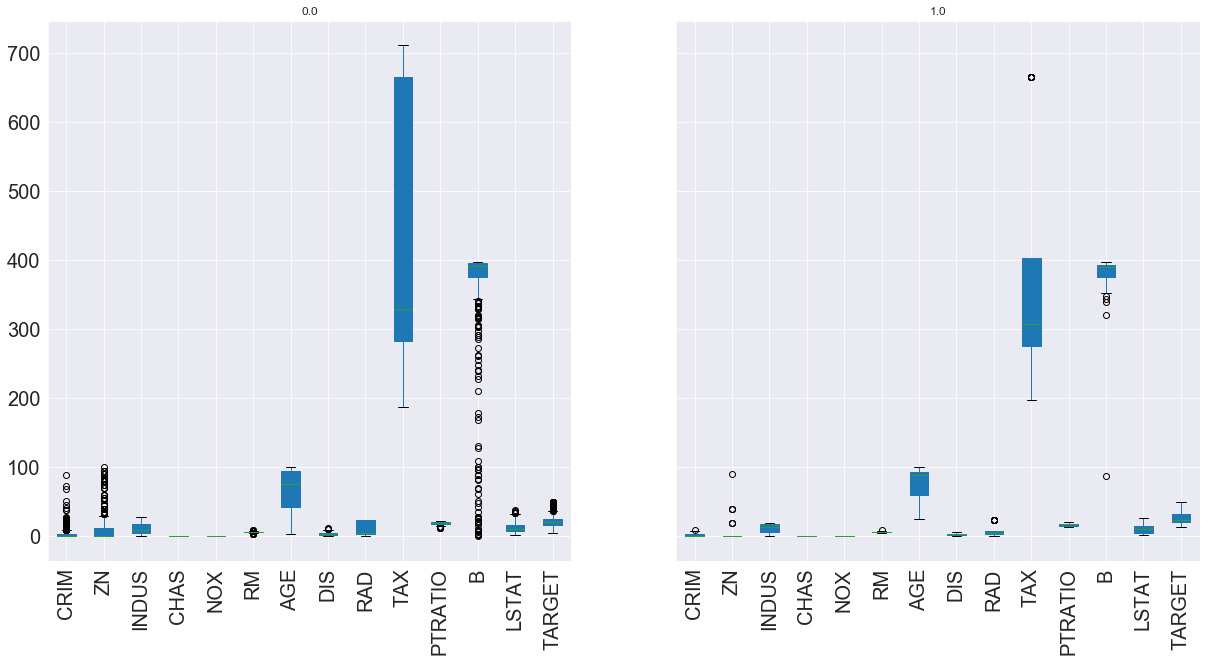

In [26]:
boston_df.groupby('CHAS').boxplot(fontsize=20, rot=90, figsize=(20,10), patch_artist=True)

### Pivot tables

In [27]:
import numpy as np

pivot = pd.pivot_table(boston_df, values='TARGET', index=['CHAS'], aggfunc=np.mean)
pivot

,TARGET
CHAS,
0.0,22.093843
1.0,28.440000


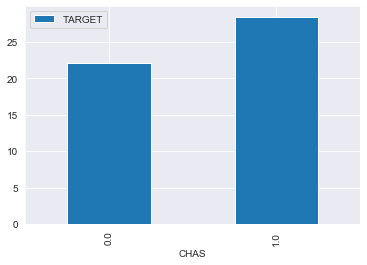

In [28]:
#seen as bar chart
pivot.plot(kind='bar')

## Groupby with Titanic Dataset

In [29]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.style.use('dark_background')
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [30]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']
train = pd.read_csv('http://bit.ly/kaggletrain', usecols = cols)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S


In [31]:
#Print columns separated by values of a specified column
print(type(train.groupby('Sex').mean()))
train.groupby('Sex').mean()

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Age,SibSp
Sex,,,,
female,0.742038,2.159236,27.915709,0.694268
male,0.188908,2.389948,30.726645,0.429809


### Splitting data into groups

In [32]:
grouped = train.groupby('Sex')
print(type(grouped))
grouped.first()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Survived,Pclass,Age,SibSp,Embarked
Sex,,,,,
female,1,1,38.0,1,C
male,0,3,22.0,1,S


### Split data and apply function

In [33]:
#Return the average of each column by group (female or male)
print(type(train.groupby('Sex').mean()))
train.groupby('Sex').mean()

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Age,SibSp
Sex,,,,
female,0.742038,2.159236,27.915709,0.694268
male,0.188908,2.389948,30.726645,0.429809


In [34]:
train.groupby('Sex').sum().reset_index().head()

,Sex,Survived,Pclass,Age,SibSp
0,female,233,678,7286.00,218
1,male,109,1379,13919.17,248


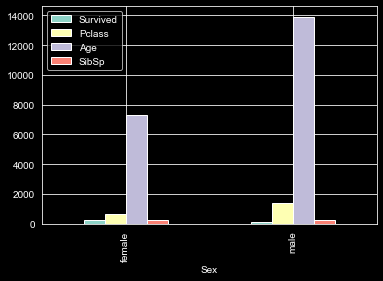

In [37]:
train.groupby('Sex').sum().plot(kind='bar');

In [38]:
print('grouped.mean():', type(grouped.mean()))
print('grouped.mean().columns:',grouped.mean().columns)
print('grouped.mean().columns.values: ', grouped.mean().columns.values)
print('grouped.mean().index: ', grouped.mean().index)
print('grouped.mean()[\'Age\'][\'female\']:',grouped.mean()['Age']['female'])
grouped.mean().head()

grouped.mean(): <class 'pandas.core.frame.DataFrame'>
grouped.mean().columns: Index(['Survived', 'Pclass', 'Age', 'SibSp'], dtype='object')
grouped.mean().columns.values:  ['Survived' 'Pclass' 'Age' 'SibSp']
grouped.mean().index:  Index(['female', 'male'], dtype='object', name='Sex')
grouped.mean()['Age']['female']: 27.915708812260537


,Survived,Pclass,Age,SibSp
Sex,,,,
female,0.742038,2.159236,27.915709,0.694268
male,0.188908,2.389948,30.726645,0.429809


In [39]:
#Check for null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [40]:
#input the missing values (null values) with the mean value
g_mean = train.groupby('Sex').mean()
train.loc[train.Age.isnull() & (train.Sex == 'female'),'Age'] = g_mean['Age']['female']
train.loc[train.Age.isnull() & (train.Sex == 'male'), 'Age'] = g_mean['Age']['male']

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [42]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S


### Group by more than one column

In [43]:
#Viewing the survival count by sex and survival
train.groupby(['Sex', 'Survived']) ['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

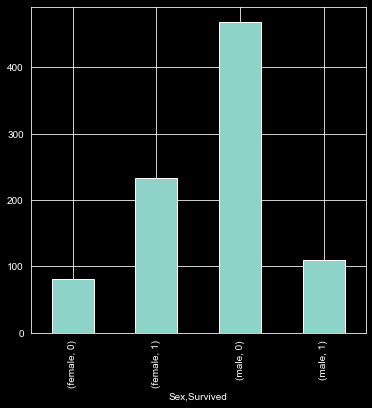

In [44]:
train.groupby(['Sex', 'Survived'] )['Survived'].count().plot.bar(figsize=(6, 6));

### Flatten after groupby

In [45]:
train.groupby(['Sex', 'Survived'] )['Survived'].count().unstack('Sex')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [46]:
print(train.groupby(['Sex', 'Survived'] )['Survived'].count().unstack(1))

Survived    0    1
Sex               
female     81  233
male      468  109


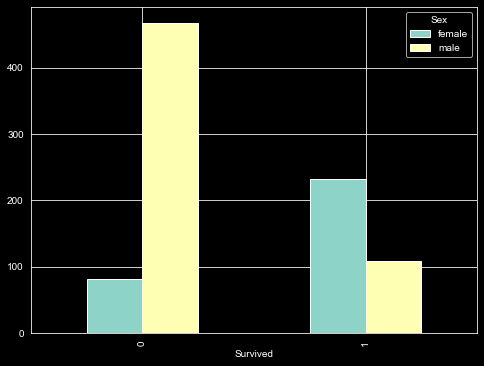

In [47]:
train_grouped = train.groupby(['Sex', 'Survived'] )['Survived'].count()
train_grouped.unstack(0).plot.bar(figsize=(8, 6));

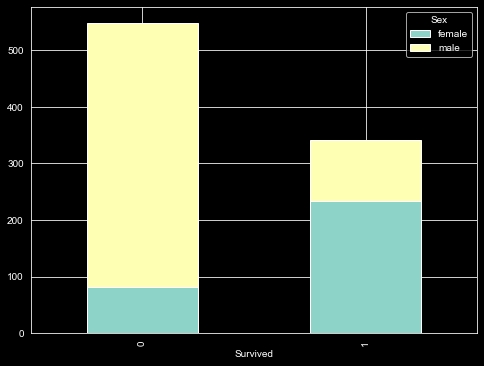

In [48]:
train_grouped.unstack(0).plot.bar(stacked=True, figsize=(8, 6));


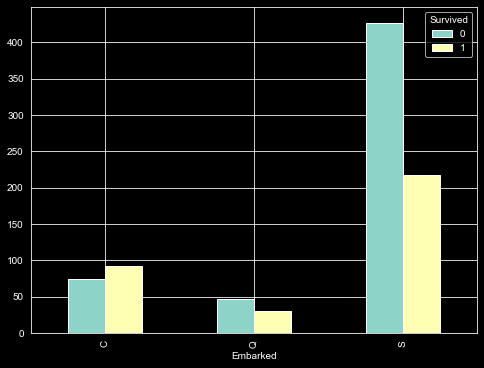

In [49]:
train.groupby(['Embarked', 'Survived'] )['Survived'].count().unstack(1).plot.bar(figsize=(8, 6));

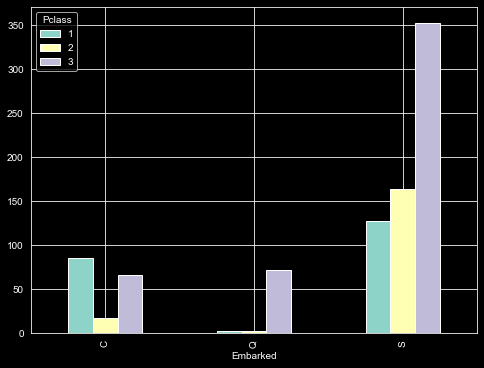

In [50]:
train.groupby(['Embarked', 'Pclass'] )['Pclass'].count().unstack(1).plot.bar(figsize=(8, 6));

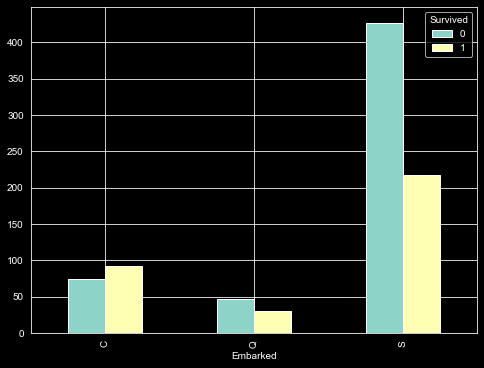

In [51]:
train.groupby(['Embarked', 'Survived'] )['Survived'].count().unstack(1).plot.bar(figsize=(8, 6));

## Plotting with Seaborn

In [52]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [98]:
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

cols = ['Survived', 'Pclass', 'Sex', 'Fare', 'Age', 'SibSp', 'Embarked']
titanic = pd.read_csv(r'C:\Users\16824\Downloads\train.csv', usecols = cols)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


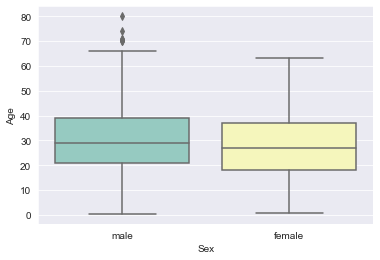

In [99]:
#boxplot
sns.boxplot(x='Sex', y='Age', data = titanic)


C:\Users\16824\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\16824\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


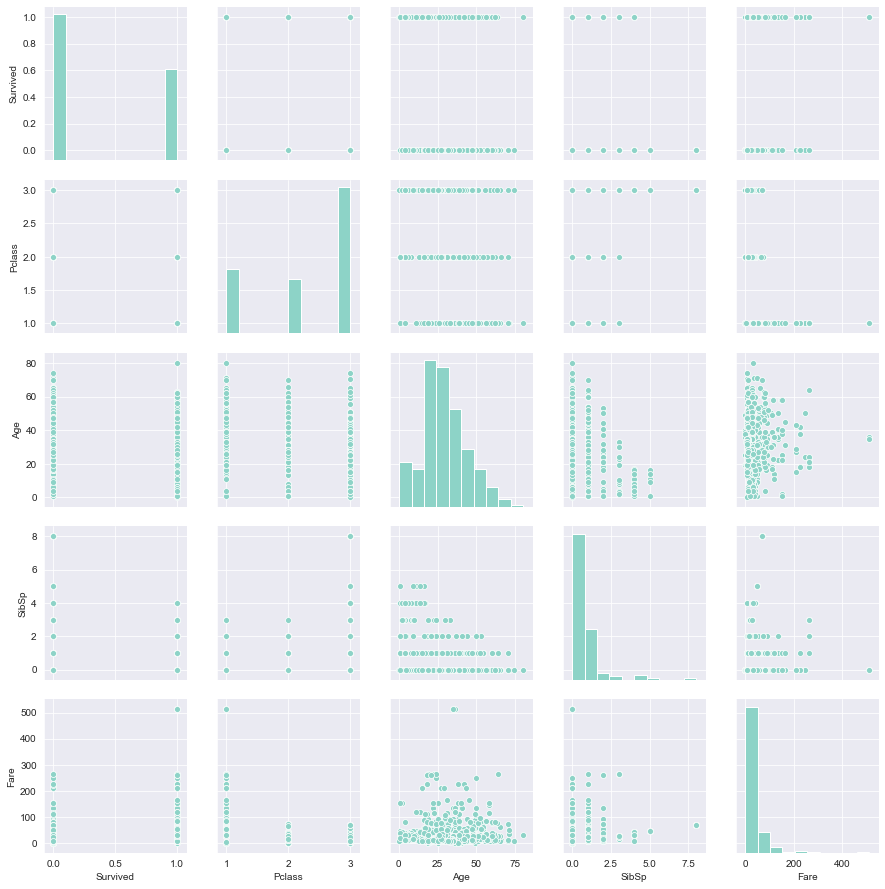

In [100]:
#pairpolot
sns.pairplot(titanic)

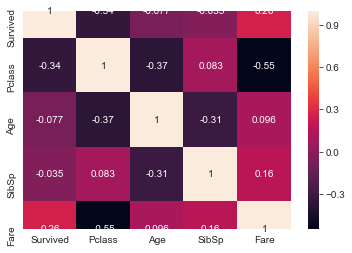

In [101]:
#correlation plot
corr = titanic.corr()
sns.heatmap(corr, annot=True)

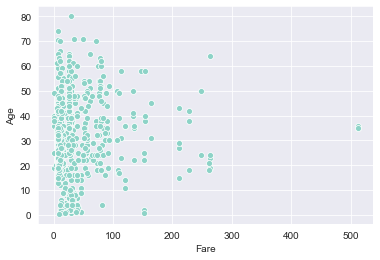

In [103]:
#scatterplot
sns.scatterplot(x = 'Fare', y = 'Age', data= titanic)

### Creating subplots

In [116]:
%matplotlib inline
import pandas as pd
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [117]:
print(titanic.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')


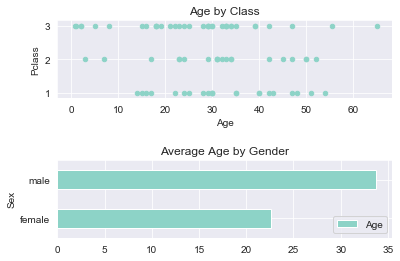

In [195]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
titanic_sample = titanic.sample(100)
titanic_sample.groupby('Survived').plot.scatter(x='Age', y='Pclass', ax=ax1, legend=True)
ax1.set_title("Age by Class")
titanic_sample.groupby('Sex')['Age'].mean().sort_values().plot(kind='barh',ax=ax2, legend=True)
ax2.set_title("Average Age by Gender")

fig.subplots_adjust(hspace=0.8)